# Libraries Imported

In [2]:
import cv2
import os
import numpy as np
from PIL import Image as im
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
%matplotlib inline 
from warnings import filterwarnings
filterwarnings('ignore')
import tensorflow as tf
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [7]:
import Augmentor
p = Augmentor.Pipeline("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s5")
p.rotate(probability=0.7, max_left_rotation=0.5, max_right_rotation=0.5)
p.sample(200)

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x2455377E470>:   0%| | 1/200 [00:00<00:1

Initialised with 42 image(s) found.
Output directory set to C:\Users\Maria\Desktop\FRANCIS\FALL SEM 21-22\IMP\our  project\Dataset\Live Detection\sharpening\training-data-fischer_sharpening\s5\output.

Processing <PIL.Image.Image image mode=RGB size=1280x720 at 0x2455376ED30>: 100%|█| 200/200 [00:05<00:00, 35.52 Samples


# 1. CNN

In [3]:
data=[]

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])


for i in range(1,40):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s1\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,0])
    

for i in range(1,301):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s1\\output\\1 ('+str(i)+').jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,0])

    
for i in range(1,46):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s2\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,1])


for i in range(1,301):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s2\\output\\1 ('+str(i)+').jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,1])
       
    
for i in range(1,32):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s3\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,2])
    

for i in range(1,301):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s3\\output\\1 ('+str(i)+').jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,2])

 
    
for i in range(1,30):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s4\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,3])
    
for i in range(1,301):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s4\\output\\1 ('+str(i)+').jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,3])
    

for i in range(1,43):
    
    img5 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s5\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,4])
    
    
for i in range(1,301):
    
    img5 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s5\\output\\1 ('+str(i)+').jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,4])

print(data)

[[array([[[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [216, 218, 217],
        [ 86,  88,  87],
        [ 31,  33,  32]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [216, 218, 217],
        [ 86,  88,  87],
        [ 31,  33,  32]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [216, 218, 217],
        [ 86,  88,  87],
        [ 31,  33,  32]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  0,   0,   1],
        [  0,   0,   3],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  5,   6,  11],
        [  0,   0,   4],
        [  0,   0,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  9,  10,  15],
        [  0,   2,   7],
        [  0,   0,   0

In [4]:
data2=[]

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])


i=1
while(i<42):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\testing_sharpening\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data2.append([image_sharp1,0])
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\testing_sharpening\\'+str(i+1)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data2.append([image_sharp1,1])
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\testing_sharpening\\'+str(i+2)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data2.append([image_sharp1,2])
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\testing_sharpening\\'+str(i+3)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data2.append([image_sharp1,3])
    
    i=i+4
    


for i in range(45,53):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\testing_sharpening\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data2.append([image_sharp1,4])

    
    

print(data2)
   

[[array([[[ 84,  33,   0],
        [ 76,  39,  24],
        [ 94,  46,  25],
        ...,
        [ 46,  18,   1],
        [ 76,  47,  35],
        [ 58,  12,   0]],

       [[ 97,  51,  27],
        [ 61,  25,   0],
        [ 74,  38,  21],
        ...,
        [ 46,  14,   4],
        [ 26,   0,   0],
        [ 80,  40,  16]],

       [[ 87,  32,  16],
        [ 67,  36,   5],
        [ 65,  42,  21],
        ...,
        [ 40,  10,   1],
        [ 68,  39,  21],
        [ 60,  19,   0]],

       ...,

       [[ 93,  50,  20],
        [ 99,  69,  27],
        [ 99,  56,  12],
        ...,
        [ 74,  30,   4],
        [103,  54,  42],
        [ 57,  27,   6]],

       [[ 87,  46,  11],
        [ 83,  52,  11],
        [ 88,  43,   6],
        ...,
        [ 82,  32,   8],
        [ 68,  20,   7],
        [ 60,  39,  12]],

       [[ 83,  39,   3],
        [ 70,  41,   4],
        [126,  95,  68],
        ...,
        [ 72,  24,   0],
        [ 83,  36,  19],
        [ 54,  19,   0

In [5]:
import random 
random.shuffle(data)
random.shuffle(data2)

In [6]:
labels= ['Angelina Jolie','Mohanlal','Mammotty','Gal Gadot','Francis']

In [7]:
X_train =[]
y_train =[]
for features, label in data:
  X_train.append(features)
  y_train.append(label)
  
X_train = np.array(X_train).reshape(-1,256,256,3)


In [8]:
X_test =[]
y_test =[]
for features, label in data2:
  X_test.append(features)
  y_test.append(label)
  
X_test = np.array(X_test).reshape(-1,256,256,3)

In [9]:
X_train = X_train.astype('float32')

X_train /= 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,5)
y_test = np_utils.to_categorical(y_test,5)

Using TensorFlow backend.


In [10]:
X_train.shape

(1686, 256, 256, 3)

In [11]:
X_test.shape

(52, 256, 256, 3)

In [13]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(units=5, activation="softmax"))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)       

In [15]:
hist= cnn.fit(X_train, y_train, batch_size =50, epochs =10, verbose = 1, validation_data = (X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1686 samples, validate on 52 samples
Epoch 1/10
1686/1686 [==============================] - 76s 45ms/sample - loss: 0.4031 - acc: 0.8301 - val_loss: 4.8371 - val_acc: 0.6846
Epoch 2/10
1686/1686 [==============================] - 78s 46ms/sample - loss: 0.3687 - acc: 0.8396 - val_loss: 4.8371 - val_acc: 0.6846
Epoch 3/10
1686/1686 [==============================] - 78s 47ms/sample - loss: 0.3664 - acc: 0.8396 - val_loss: 4.8371 - val_acc: 0.6846
Epoch 4/10
1686/1686 [==============================] - 78s 46ms/sample - loss: 0.3654 - acc: 0.8396 - val_loss: 4.8371 - val_acc: 0.6846
Epoch 5/10
1686/1686 [==============================] - 77s 46ms/sample - loss: 0.3655 - acc: 0.8396 - val_loss: 4.8371 - val_acc: 0.6846
Epoch 6/10
1686/1686 [==============================] - 77s 46ms/sample - loss: 0.3659 - acc: 0.8396 - val_loss: 4.8371 - val_acc: 0.6846
Epoch 7/10
1686/1686 [==========

# 2. ML

In [16]:
neutral = []
categ=[]

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for i in range(1,40):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s1\\'+str(i)+'.jpg')
    
    
    img1 = img1.resize((128,128), im.ANTIALIAS)
    
    
    image_arr1 = np.array(img1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    
    
    
    
    img6=  image_sharp1.flatten()
   
    
    
    neutral.append(img6)
    categ.append(0)
    
for i in range(1,45):
    
    
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s2\\'+str(i)+'.jpg')
   
    
    img2 = img2.resize((128,128), im.ANTIALIAS)
    
    
    image_arr2 = np.array(img2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    

    img7 = image_sharp2.flatten()
    
    neutral.append(img7)
    categ.append(1)
   

for i in range(1,32):
    
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s3\\'+str(i)+'.jpg')
    
    img3 = img3.resize((128,128), im.ANTIALIAS)
    

    image_arr3 = np.array(img3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    

    img8 = image_sharp3.flatten()
    
    neutral.append(img8)
    categ.append(2)
    

for i in range(1,30):
    
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s4\\'+str(i)+'.jpg')
    

    img4 = img4.resize((128,128), im.ANTIALIAS)
    

    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    

    img9 =  image_sharp4.flatten()
    

    neutral.append(img9)
    categ.append(3)
    

for i in range(1,43):
    
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening\\s5\\'+str(i)+'.jpg')
    

    img4 = img4.resize((128,128), im.ANTIALIAS)
    

    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    

    img9 =  image_sharp4.flatten()
    

    neutral.append(img9)
    categ.append(4)



In [17]:
neut=np.array(neutral)

df=pd.DataFrame(neut)

target=np.array(categ)

df['Target']=target

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,Target
0,0,0,0,255,255,255,39,41,40,213,...,68,69,74,17,18,23,0,0,0,0
1,76,112,134,72,107,121,68,106,135,69,...,255,255,255,126,111,85,255,255,255,0
2,227,208,201,227,208,201,226,207,200,229,...,171,166,139,255,255,244,190,181,159,0
3,249,176,123,249,176,123,249,176,123,249,...,60,60,62,54,54,56,0,0,0,0
4,9,10,4,8,9,3,13,14,8,10,...,179,133,113,206,145,126,225,153,146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,136,163,170,175,158,216,167,157,161,180,...,31,72,88,145,133,124,187,189,215,4
181,132,143,71,149,150,144,166,163,166,147,...,51,64,45,94,156,150,190,183,244,4
182,107,154,195,178,158,140,171,163,176,205,...,75,60,20,181,123,160,160,195,232,4
183,155,145,100,160,153,197,183,154,172,162,...,39,74,29,143,124,141,189,194,190,4


In [19]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train=x
y_train=y

In [20]:
n2=[]
c2=[]

i=1;

while(i<41):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\testing_sharpening\\'+str(i)+'.jpg')
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\testing_sharpening\\'+str(i+1)+'.jpg')
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\testing_sharpening\\'+str(i+2)+'.jpg')
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\testing_sharpening\\'+str(i+3)+'.jpg')
    
    
    img1 = img1.resize((128,128), im.ANTIALIAS)
    img2 = img2.resize((128,128), im.ANTIALIAS)
    img3 = img3.resize((128,128), im.ANTIALIAS)
    img4 = img4.resize((128,128), im.ANTIALIAS)
    
    
    image_arr1 = np.array(img1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    
    image_arr2 = np.array(img2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
   
    
    image_arr3 = np.array(img3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    
    
    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    
    
    
    img6=  image_sharp1.flatten()
    img7 = image_sharp2.flatten()
    img8 = image_sharp3.flatten()
    img9 =  image_sharp4.flatten()
    
    
    n2.append(img6)
    c2.append(0)
    n2.append(img7)
    c2.append(1)
    n2.append(img8)
    c2.append(2)
    n2.append(img9)
    c2.append(3)
    
    i=i+4;

for i in range(45,53):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Real-time Detection\\sharpening\\testing_sharpening\\'+str(i)+'.jpg')
    img1 = img1.resize((128,128), im.ANTIALIAS)
    
    image_arr1 = np.array(img1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    
    img6=  image_sharp1.flatten()
    
    n2.append(img6)
    c2.append(4)

In [21]:
n2=np.array(n2)
c2=np.array(c2)

n2.shape

(48, 49152)

In [22]:
df2=pd.DataFrame(n2)

target=np.array(c2)

df2['Target']=target

In [23]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

x_test=x
y_test=y

In [24]:
x_test.shape

(48, 49152)

In [25]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

In [26]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 0, 0, 1, 0, 3, 2, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 1, 0, 1, 2, 3, 4, 4, 4, 4,
       4, 4, 4, 4])

In [27]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 4, 4, 4, 4,
       4, 4, 4, 4])

In [28]:
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 91.66666666666666% accurate


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [30]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.91      1.00      0.95        10
           2       0.90      0.90      0.90        10
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00         8

    accuracy                           0.92        48
   macro avg       0.93      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48



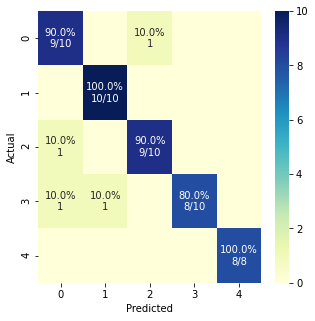

In [31]:
plot_cm(y_test,y_pred)

In [32]:
def detect_face(img):
   
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\haarcascade_frontalface_alt.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=0);
    
    if (len(faces) == 0):
        return None, None
    
    (x, y, w, h) = faces[0]

    return gray, faces[0]

In [33]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN,1.3, (0, 255, 0), 2)

In [34]:
subjects = ["","Angelina", "Mohanlal","Mammotty","Gal Gadot","Francis"]

In [35]:
def prepare_training_data(data_folder_path):
    
    
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []
    
    
    for dir_name in dirs:
        
        
        if not dir_name.startswith("s"):
            continue;
            
        
        label = int(dir_name.replace("s", ""))
        
        subject_dir_path = data_folder_path + "\\" + dir_name
        
        subject_images_names = os.listdir(subject_dir_path)
        
    
        for image_name in subject_images_names:
            
            if image_name.startswith("."):
                continue;
            
            image_path = subject_dir_path + "\\" + image_name

            image = im.open(image_path)
            
            image = image.resize((256,256))
            
            image=np.array(image)
            
            
            cv2.imshow("Training on image...", image)
            cv2.waitKey(1)
            
            face, rect = detect_face(image)
            
            if face is not None:
                
                faces.append(face)
                labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    return faces, labels


In [36]:
print("Preparing data...")
faces, labels = prepare_training_data("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Live Detection\\sharpening\\training-data-fischer_sharpening - fisher")
print("Data prepared")

print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
Data prepared
Total faces:  174
Total labels:  174


# 3. LBPH

In [37]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

faces=np.array(faces)
labels=np.array(labels)

face_recognizer.train(faces,labels)

# EigenFace

In [38]:
face_recognizer1 = cv2.face.EigenFaceRecognizer_create()

faces=np.array(faces)
labels=np.array(labels)

face_recognizer1.train(faces,labels)

# Fisherface

In [39]:
face_recognizer2 = cv2.face.FisherFaceRecognizer_create()

faces=np.array(faces)
labels=np.array(labels)

face_recognizer2.train(faces,labels)

# Live Face Recognition Using Hybrid Algorithm

In [48]:
from collections import Counter

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

video = cv2.VideoCapture(0);

while True:
    check, frame = video.read();
    faces = face_cascade.detectMultiScale(frame,scaleFactor=1.1, minNeighbors=5);
    for x,y,w,h in faces:
        frame = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3);
        
        img=frame
        
    cv2.imshow('Face Detector', frame);

    key = cv2.waitKey(1);

    if key == ord('q'):
        break;

video.release();
cv2.destroyAllWindows();


data = im.fromarray(img)
img_cn=data.resize((256,256))
img_cn = np.array(img_cn)
img_cn = img_cn/255
img_cn = np.expand_dims(img_cn, axis=0)
prediction = cnn.predict(img_cn, batch_size=None,steps=1)
x=max(prediction)
y=max(x)
pos=0
for j in range(0,4):
    if(y==x[j]):
         pos=j
        
p_cnn=pos
    
d=[]
img_ml=data.resize((128,128))
img_ml=np.array(img_ml)
image_sharp1 = cv2.filter2D(src=img_ml, ddepth=-1, kernel=kernel)
img6=  image_sharp1.flatten()
d.append(img6)
x_test1=pd.DataFrame(d)
y_pred=model.predict(x_test1)
p_ml=y_pred[0]


img=data.resize((256,256))
img = np.array(img)
        
face, rect = detect_face(img)
    
label= face_recognizer.predict(face)
label1= face_recognizer1.predict(face)
label2= face_recognizer2.predict(face)

p=[]

p.append(label[0])
p.append(label1[0])
p.append(label2[0])
p.append(p_ml+1)
p.append(p_cnn+1)


occurence_count = Counter(p)
num= occurence_count.most_common(1)[0][0]

print(num)

label_text = subjects[num]


video = cv2.VideoCapture(0);


while True:
    check, frame = video.read();
    faces = face_cascade.detectMultiScale(frame,scaleFactor=1.1, minNeighbors=5);
    for x,y,w,h in faces:
        frame = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3);
        cv2.putText(frame,label_text,(x, y), cv2.FONT_HERSHEY_PLAIN,1.3, (0, 255, 0), 2)
        
    cv2.imshow('Face Detector', frame);

    key = cv2.waitKey(1);

    if key == ord('q'):
        break;

video.release();
cv2.destroyAllWindows();



5


# Result Screenshot

Text(0.5, 1.0, 'Real-time Detection')

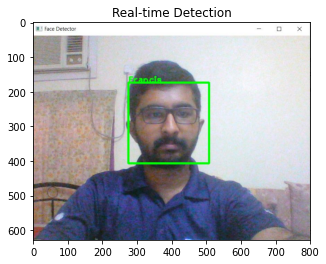

In [42]:
image_result= im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\result.jpg")

plt.imshow(image_result)

plt.title("Real-time Detection")